# Project: Horse or Human Classification using CNN

## We have data for training:

500 horse images 527 human(male & female) images



## For validation:

128 horse images 128 human(male & female) images

## Problem Statement:
Classifie given image is horse or human(male/female)

## Solution:
To solve this problem we are going to use Deep Learning Algorithm that is CNN (Convolutional Neural Network)

### Dara Scource
Raw Data Scource: https://www.kaggle.com/sanikamal/horses-or-humans-dataset


## Load Libraries

In [1]:
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2
from keras.layers.normalization import BatchNormalization
import keras
from keras.preprocessing.image import ImageDataGenerator

## To show the version of keras

In [2]:
keras.__version__

'2.5.0'

## Load Data

In [3]:
train_data_path = "./dataset/train/"
validation_data_path = "./dataset/validation/"

## Data Preprocessing

In [4]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [5]:
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 1027 images belonging to 2 classes.


In [6]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [7]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 256 images belonging to 2 classes.


In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

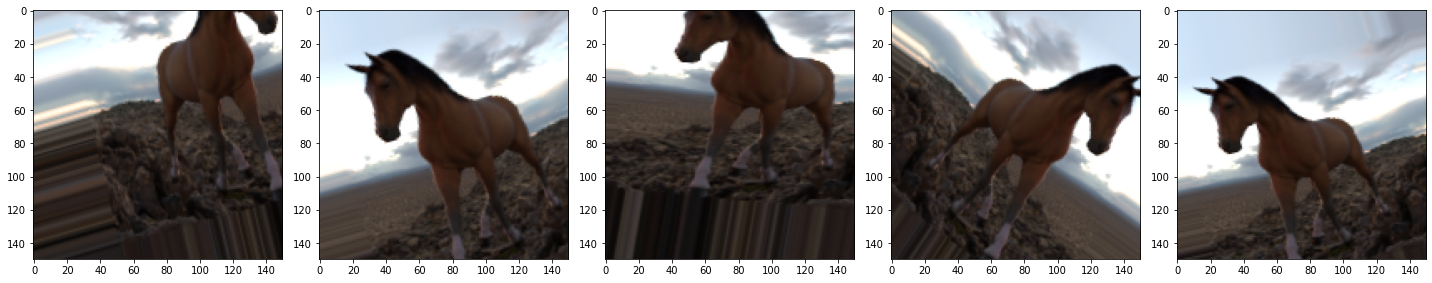

In [10]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [12]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [13]:
# compile cnn model
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model_path = './dataset/horse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [15]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
33/33 [==============================] - 73s 2s/step - loss: 1.0865 - accuracy: 0.5965 - val_loss: 0.8861 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to ./dataset\horse_or_human_predictor.h5
Epoch 2/100
33/33 [==============================] - 50s 2s/step - loss: 0.7971 - accuracy: 0.6911 - val_loss: 1.2191 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/100
33/33 [==============================] - 60s 2s/step - loss: 0.7763 - accuracy: 0.7311 - val_loss: 1.3083 - val_accuracy: 0.5000

Epoch 00003: val_accuracy did not improve from 0.50000
Epoch 4/100
33/33 [==============================] - 64s 2s/step - loss: 0.7295 - accuracy: 0.7467 - val_loss: 1.4221 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.50000
Epoch 5/100
33/33 [==============================] - 65s 2s/step - loss: 0.7688 - accuracy: 0.7113 - val_loss: 1.6391 - val_accuracy: 0.5000

Epoch 00005: v

33/33 [==============================] - 52s 2s/step - loss: 0.4315 - accuracy: 0.8576 - val_loss: 2.9455 - val_accuracy: 0.6055

Epoch 00040: val_accuracy did not improve from 0.78516
Epoch 41/100
33/33 [==============================] - 53s 2s/step - loss: 0.4422 - accuracy: 0.8596 - val_loss: 1.2457 - val_accuracy: 0.7500

Epoch 00041: val_accuracy did not improve from 0.78516
Epoch 42/100
33/33 [==============================] - 51s 2s/step - loss: 0.4215 - accuracy: 0.8479 - val_loss: 1.1612 - val_accuracy: 0.7578

Epoch 00042: val_accuracy did not improve from 0.78516
Epoch 43/100
33/33 [==============================] - 49s 1s/step - loss: 0.3925 - accuracy: 0.8624 - val_loss: 2.5274 - val_accuracy: 0.6094

Epoch 00043: val_accuracy did not improve from 0.78516
Epoch 44/100
33/33 [==============================] - 51s 2s/step - loss: 0.4007 - accuracy: 0.8525 - val_loss: 3.8606 - val_accuracy: 0.5703

Epoch 00044: val_accuracy did not improve from 0.78516
Epoch 45/100
33/33 [===

33/33 [==============================] - 62s 2s/step - loss: 0.2842 - accuracy: 0.8985 - val_loss: 6.4742 - val_accuracy: 0.5156

Epoch 00081: val_accuracy did not improve from 0.86328
Epoch 82/100
33/33 [==============================] - 58s 2s/step - loss: 0.3505 - accuracy: 0.8756 - val_loss: 6.1375 - val_accuracy: 0.5273

Epoch 00082: val_accuracy did not improve from 0.86328
Epoch 83/100
33/33 [==============================] - 53s 2s/step - loss: 0.2994 - accuracy: 0.9023 - val_loss: 2.4785 - val_accuracy: 0.6328

Epoch 00083: val_accuracy did not improve from 0.86328
Epoch 84/100
33/33 [==============================] - 50s 1s/step - loss: 0.2979 - accuracy: 0.8907 - val_loss: 2.4371 - val_accuracy: 0.6172

Epoch 00084: val_accuracy did not improve from 0.86328
Epoch 85/100
33/33 [==============================] - 50s 2s/step - loss: 0.2830 - accuracy: 0.9099 - val_loss: 1.4937 - val_accuracy: 0.7344

Epoch 00085: val_accuracy did not improve from 0.86328
Epoch 86/100
33/33 [===

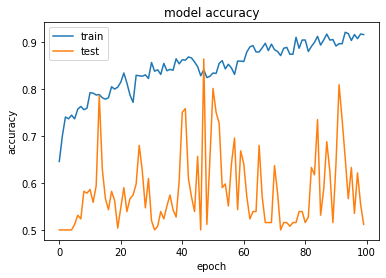

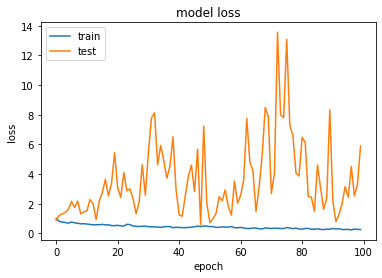

In [16]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()